
El teorema de convolución con ejemplos de aplicación

El teorema de convolución es una propiedad fundamental de la transformada de Fourier. 

A menudo se dice como "La convolución en el dominio del tiempo es igual a la multiplicación en el dominio de la frecuencia" o viceversa "La multiplicación en el tiempo es igual a la convolución en el dominio de la frecuencia"

Para comprender esto, podemos expresar matemáticamente el teorema. 

Sean $x(t)$ y $y(t)$ dos señales arbitrarias. Entonces 
$$\mathcal{F}\{x(t) * y(t) \}(f) = \mathcal{F} \{ x(t) \}(f) \cdot \mathcal{F} \{y(t) \}(f)$$

donde $\mathcal{F} \{x(t) \}(f)$ denota la transformada de Fourier de $x(t)$, evaluada a la frecuencia $f$. 
En otras palabras, podemos decir:

    "El espectro de la convolución de dos señales es igual a la multiplicación de los espectros de ambas señales"

La convolución de dos señales $x(t)$ y $y(t)$, su convolución se define por 

$$z(t)=x(t)∗y(t)= \int_{\infty}^{−\infty} x(\tau)y(t− \tau)d\tau$$

Literalmente, tomamos una señal, la reflejamos en el tiempo y la cambiamos en el dominio del tiempo. 
Luego multiplicamos esta señal con la otra señal y calculamos la integral de la parte superpuesta. 
Calculemos ahora la convolución de dos señales arbitrarias y observemos el resultado en el dominio del tiempo y la frecuencia. 
Aquí, consideramos una señal de tiempo continuo, que discretizamos en el dominio del tiempo con una frecuencia de muestreo Fs=100Hz.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

gauss = lambda t: np.exp(-0.2*t*t) / 4 # The Gaussian Bell function
def lowpass(fc): # return impulse response of the ideal lowpass with cutoff fc
    return lambda t: 2*fc * np.sinc(2*fc*t)

def showConvolution(x, y):
    Fs = 100                    # signal sampling frequency
    T = 100                     # time duration for the impulse response to decay
    t = np.arange(-T, T, 1/Fs)  # the time samples
    # the time samples of the signal after convolution
    t_convolved = np.arange(-2*T, 2*T, 1/Fs)[:-1]

    # Get the samples of the signals. Multiply with Hanning window
    # to mitigate ringing/spectral leakage in the frequency domain
    x_samples = x(t) * np.hanning(len(t))
    y_samples = y(t) * np.hanning(len(t))
    z_samples = np.convolve(x_samples, y_samples) / Fs

    spec = lambda x: np.fft.fftshift(np.fft.fft(x, 16*len(t))) / Fs
    X_samples = spec(x_samples)
    Y_samples = spec(y_samples)
    Z_samples = spec(z_samples)
    f = np.linspace(-Fs/2, Fs/2, len(X_samples), endpoint=False)

    plt.gcf().clear()
    plt.subplot(121)
    plt.plot(t, x_samples, label='$x(t)$')
    plt.plot(t, y_samples, label='$y(t)$')
    plt.plot(t_convolved, z_samples, 'r', label='$z(t)$')
    plt.xlim((-25,25))
    plt.ylim((-0.1, 1))
    plt.grid(True); 
    plt.xlabel('$t$'); plt.ylabel('$x(t)$'); plt.title('Time domain')

    plt.subplot(122)
    plt.plot(f, abs(X_samples), label='$|X(f)|$')
    plt.plot(f, abs(Y_samples), label='$|Y(f)|$')
    plt.plot(f, abs(Z_samples), label='$|Z(f)|$')
    plt.xlim((-1,1))
    plt.grid(True); plt.xlabel('$f$'); plt.ylabel('$|X(f)|$'); plt.title('Frequency domain')
    plt.tight_layout(); plt.tight_layout();





<IPython.core.display.Javascript object>


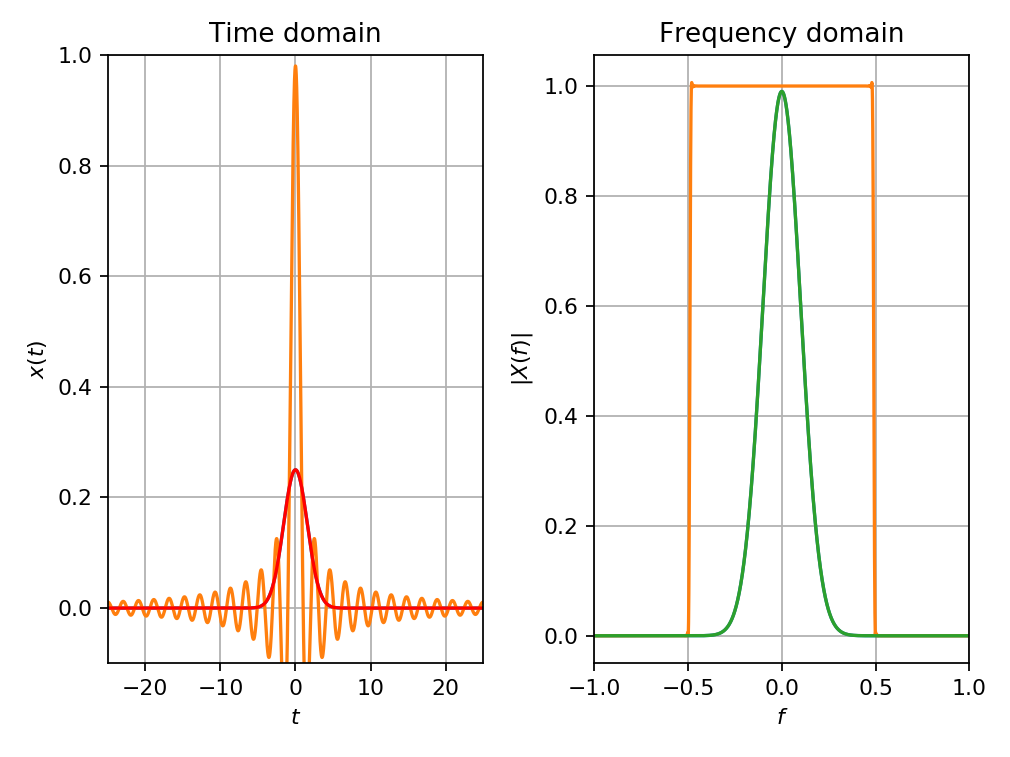

In [2]:
%matplotlib notebook 

fig, ax = plt.subplots()  
plt.subplot(121)
plt.subplot(122)
plt.ion()

fig.show()
fig.canvas.draw()

for i in np.arange(0.01, 0.5, 1/100) : #
    ax.clear()
    showConvolution(gauss, lowpass(i))
    fig.canvas.draw()
    


En el ejemplo anterior, hemos convolucionado un impulso exponencial $x(t)$ con una función sinc-cuadrado y(t). El resultado de la convolución $z(t)$ se muestra en la curva roja. 
En el lado izquierdo, podemos observar el dominio del tiempo. 
En el diagrama del lado derecho, se muestra el espectro de todas las señales. 
Vemos que el espectro del impulso exponencial es muy amplio en el dominio de la frecuencia (esto está claro, ya que tenemos el salto abrupto en $t = 0$ en el dominio del tiempo). 
Por otro lado, la función sinc-cuadrado corresponde a un triángulo en el dominio de la frecuencia con $|Y(f)| = 0$, $| f | \ge 1$. 
Finalmente, la curva roja es el producto de las curvas verde y azul: para $f = 0$, comienza en $|Z(f)| f = 0 = 1$ y decae al aumentar $f$. 

En f = 1, donde el triángulo verde se ha reducido a cero, también la curva roja ha decaído a cero.

